## PCA implementation

In [49]:
import pandas as pd
import numpy as np

In [58]:
class PCA:
    def __init__(self, n_components_ = 2):
        
        """
        Parameters
        n_components-Number of components to keep.
        
        """
        
        self.n_components_ = n_components_
        
        
        
        self.e_values = None
        self.e_vectors = None
   
    def fit_transform(self, X):
        
        self.mean_ = np.mean(X, axis=0)
        normilized_data = X - self.mean_
        
        covariance = np.cov(normilized_data.T)
        self.e_values, self.e_vectors = np.linalg.eig(covariance)
        indices = np.argsort(self.e_values)
        indices = indices[::-1]
        self.e_vectors = self.e_vectors[:,indices]
        self.e_values = self.e_values[indices]
        e_vectors = self.e_vectors[:,:self.n_components_]
       
        self.explained_variance_ = self.e_values / np.sum(self.e_values)
        self.explained_variance_ratio_ = self.explained_variance_ * 100
        
        return np.dot(normilized_data,e_vectors)

 
    

In [59]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names = ['sepal length','sepal width','petal length','petal width','target'])

In [60]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [61]:
pca = PCA()
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [62]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

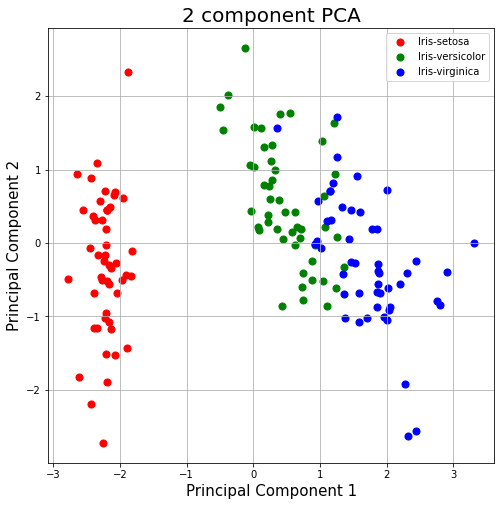

In [63]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [64]:
pca.explained_variance_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [65]:
pca.explained_variance_ratio_

array([72.77045209, 23.03052327,  3.68383196,  0.51519268])